<a href="https://colab.research.google.com/github/ulvaan2106/AIML-2025/blob/main/LAb_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Logistic Regression with Titanic data set

Import packages and data set

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [6]:
train = pd.read_csv('/content/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Check basic data set**

**Including missing values**

In [7]:
train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
d= train.describe(percentiles=[.25,.5])
d

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Plot a bar diagram to check the number of numberic entries**

Text(0, 0.5, 'Count')

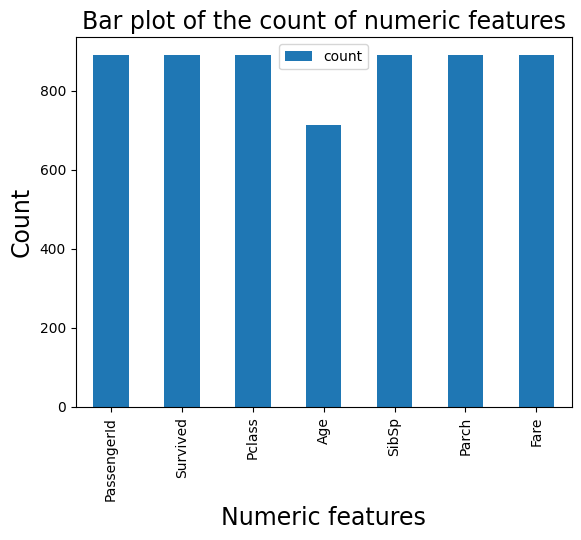

In [13]:
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)
plt.xlabel("Numeric features",fontsize=17)
plt.ylabel("Count",fontsize=17)

**Check the relative size of survived and not survived**

<Axes: xlabel='Survived', ylabel='count'>

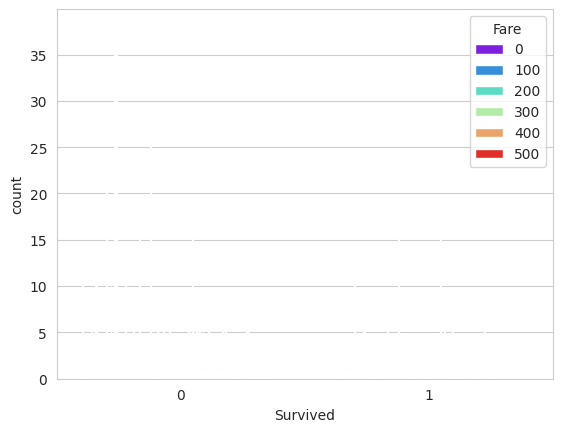

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Fare',data=train,palette='rainbow')

**Is there a pattern for the survaivability based on sex?**

It looks like more female survived than males!!

<Axes: xlabel='Survived', ylabel='count'>

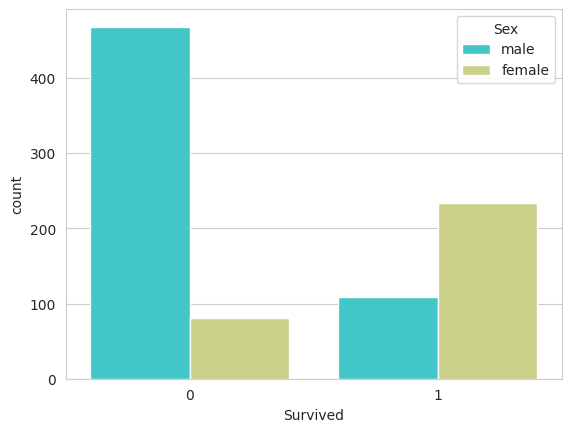

In [23]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='rainbow')

**Following code and plots the fraction of passenger count that survived, by each class**

Text(0.5, 1.0, 'Fraction of passengers survived by class')

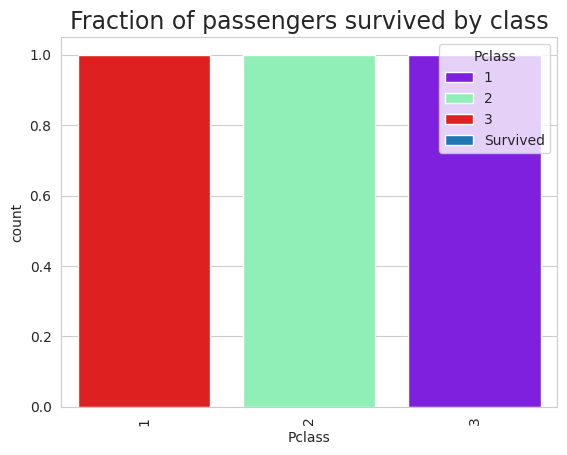

In [25]:
f_class_surrivied=train.groupby('Pclass')['Survived'].mean()
f_class_surrivied=pd.DataFrame(f_class_surrivied)
l=f_class_surrivied.shape


f_class_surrivied.plot.bar(y='Survived')
sns.countplot(x='Survived',hue='Pclass',data=f_class_surrivied,palette='rainbow')
plt.title("Fraction of passengers survived by class",fontsize=17)

**How does the overall age distribution look like?**

Text(0.5, 1.0, 'Agewise histogram of the passengers')

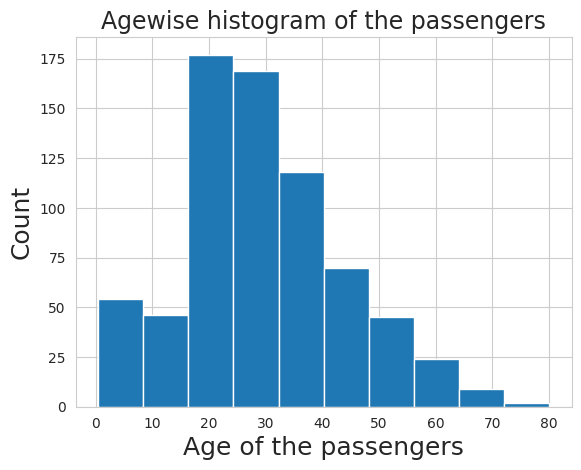

In [27]:
train['Age'].hist()
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Agewise histogram of the passengers",fontsize=17)

How

Text(0.5, 0, 'Passenger class')

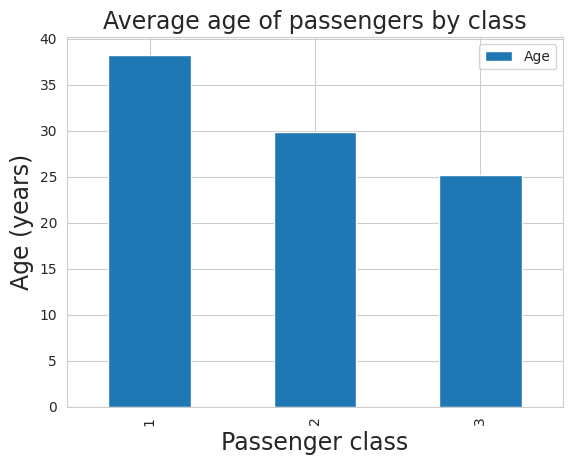

In [34]:
f_class_Age=train.groupby('Pclass')['Age'].mean()
f_class_Age=pd.DataFrame(f_class_Age)

f_class_Age.plot.bar(y='Age')
plt.title("Average age of passengers by class",fontsize=17)
plt.ylabel("Age (years)", fontsize=17)
plt.xlabel("Passenger class",fontsize=17)

In [37]:
a=list(f_class_Age['Age'])
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return a[0]
    elif Pclass==2:
      return a[1]
    else:
      return a[2]
  else:
    return Age

**Apply the above defined function and plot the count of numeric features**